# Neural Networks

## Team
<table align="left">
    <tr align="left"><th>Surname</th><th>Name</th><th>Student ID</th></tr>
    <tr><td>Gezekelian</td><td>Viken</td><td>03116112</td></tr>
    <tr><td>Tarasi</td><td>Stelina</td><td>03116442</td></tr>
    <tr><td>Tsagkarakis</td><td>Stylianos</td><td>03115180</td></tr>
</table>


# Small Dataset - S01

## Section A: Basic Information
(S01) Echocardiogram DataSet





### 1. Introduction




Το dataset που θα χρησιμοποιήσουμε αφορά το ηχοκαρδιογράφημα ασθενών που έχουν στο παρελθόν υποστεί καρδιακή προσβολή. Ένα μέρος τον ασθενών βρίσκεται εν ζωή ενώ οι υπόλοιποι όχι. Παρατηρώντας τις παραμέτρους επιβίωσης και εάν βρίσκονται ακόμη εν ζωή, ερευνήθηκε κατά πόσο ο ασθενής έζησε για ένα τουλάχιστον χρόνο μετά την καρδιακη προσβολη. 

Οι ερευνητές θέλησαν να προβλέψουν την πορεία των ασθενών στο μέλλον και πιο συγκεκριμένα το ενδεχόμενο επιβίωσης για τουλάχιστον ένα χρόνο μετά την καρδιακή προσβολή συνυπολοζίζοντας τις υπόλοιπες παραμέτρους των δεδομένων . 

Από το documentation βλέπουμε πως έχουμε ένα σύνολο 132 δειγμάτων με 12 χαρακτηριστικά, ενώ υπάρχουν τιμές που λείπουν. 


###2. Samples and features

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install -U imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import ast
import io
import requests
import matplotlib.pyplot as plt

#Import data from our github
data_csv_url = "https://raw.githubusercontent.com/steliostss/neural_networks_ntua/master/nn2020-21/Assignment1/Small_Dataset/echocardiogram.data"
data = pd.read_csv(data_csv_url, error_bad_lines=False,header=None)

print("Succesful file processing!")
data

Succesful file processing!


b'Skipping line 50: expected 13 fields, saw 14\n'


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
127,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
128,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [ ]:
print("Number of samples is",data.shape[0]  ,",number of features is",data.shape[1]-1,"and there is a label.")

Number of samples is 131 ,number of features is 12 and there is a label.


Οι τιμές της τελευταίας στήλης δείχνουν αν ο ασθενής επέζησε (τιμή 1) ή όχι (τιμή 0) για ένα χρόνο μετά το καρδιακό επεισόδιο.

Η εισαγωγή των δεδομένων αντιμετωπίζει πρόβλημα στην 50η σειρά όπου τα δεδομένα δεν είναι σωστά καταχωρημένα. Παρόλα αυτά, αυτό δε θα αποτελέσει πρόβλημα καθώς δε θα χρησιμοποιήσουμε δεδομένα που στη τελευταία στήλη έχουν "?".

Τα χαρακτηριστικά έχουν αριθμητική float μορφή, εκτός από το όνομα που δε θα χρησιμοποιήσουμε.



###3. Headers 

Το dataset δεν περιέχει επικεφαλίδες και για αυτό χρησιμοποιήσαμε την παράμετρο header = none ενώ δεν υπάρχει ούτε αρίθμηση.

###4. Labels

Οι ετικέτες βρίσκονται στην τελευταία στήλη και λαμβάνουν τις τιμές 0 (αν ο ασθενής απεβίωσε) και 1 (αν ο ασθενής επέζησε).

In [ ]:
labels = data.iloc[:,-1] #Labels are in last column(12)
feats  = data.iloc[:,:-1]
print (labels)


0      0
1      0
2      0
3      0
4      0
      ..
126    ?
127    ?
128    ?
129    ?
130    ?
Name: 12, Length: 131, dtype: object


###5.Text

Δεν πραγματοποιήσαμε κάποια αλλαγή στα αρχεία text, ωστόσο θα πραγματοποιήσουμε κάποιες αλλαγές στα δεδομένα κατά την ανάλυση τους καθώς τα δείγματα που έχουν ? στη τελευταία στήλη θα αφαιρεθούν. Ακόμα σύμφωνα με τις οδηγίες της άσκησης θα αφαιρεθούν οι στήλες 0,1,2,10,11 οι οποίες δίνουν πολύ υψηλές τιμές χωρίς να βελτιστοποιούν το αποτέλεσμα. 


###6. Missing Values

Υπάρχουν απουσιάζουσες τιμές οι οποίες παριστάνονται με "?". 

In [ ]:
misv = sum(feats == '?') + sum(labels == '?') #sum of ? values without line 50 


print("Total missing values (without line 50):", misv,'\n')


Total missing values (without line 50): 123 



Τώρα θα κάνουμε μετατροπές στο dataset όπως αναφέρονται στο FAQ της άσκησης αφαιρώντας τα δείγματα που στη τελευταία στήλη του label έχουν τις τιμές ?, καθώς και τις στήλες που δε χρειάζονται, παίρνοντας τα νέα ποσοστά.

In [ ]:
data = data[data[12] != '?']# remove samples with no label
data = data.drop(columns=[0,1,9,10,11]) #remove columns from faq

labels = data.iloc[:,-1] #new labels
feats  = data.iloc[:,:-1] #new feats
features_v= feats.values
features = features_v.T[:,:]

one_missing = sum(sum(features == '?')!=0)
print("Now we have",one_missing,"samples that they dont have at least one value out of",data.shape[0],"so :",one_missing/data.shape[0]*100,"%")

Now we have 12 samples that they dont have at least one value out of 74 so : 16.216216216216218 %


###7. Balance

'Εχουμε δύο κατηγορίες, 0 και 1 ,συνεπώς προκύπτει εύκολα η συχνότητα τους.

In [ ]:
labels = labels.astype(int)
alive = sum(labels)
dead = data.shape[0]-alive
per_alive = alive/data.shape[0]*100
per_dead = dead/data.shape[0]*100
print("Number of alive persons (1) :",alive,"(",per_alive,"%)","\n")
print("Number of persons that have died (0) :", dead,"(",per_dead,"%)","\n")


Number of alive persons (1) : 24 ( 32.432432432432435 %) 

Number of persons that have died (0) : 50 ( 67.56756756756756 %) 



Βλέπουμε πως το dataset δεν είναι ισορροπημένο καθώς οι τιμές για το 0 είναι περισσότερες ξεπερνώντας την αναλογία 1.5. Για αυτό το λόγο στη συνέχεια θα κάνουμε oversampling ώστε να διορθώσουμε αυτή τη διαφορά και να πάρουμε πιο έγκυρα αποτελέσματα.

###8.Train and Test

Σε αυτό το σημείο θα χωρίσουμε τα δεδομένα μας σε train και test και αντίστοιχα τα labels . 


In [ ]:
from sklearn.model_selection import train_test_split

feats= np.where(feats=='?',-1,feats)
x_train,x_test,y_train,y_test = train_test_split(feats,labels,test_size=0.2)  #y_train, y_test:labels

In [ ]:
from sklearn.impute import SimpleImputer

np.set_printoptions(suppress=True)

si = SimpleImputer(missing_values=-1,strategy='mean')
x_train = si.fit_transform(x_train)
x_test  = si.fit_transform(x_test)

## Section B: Baseline classification

Σε αυτό το σημείο θα χρησιμοποιήσουμε τους Dummy, Gaussian Naive Bayes και kΝΝ ταξινομητές παρατηρώντας την απόδοση τους.

### Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier
import time

def DummyClassification(x_train,y_train,x_test,y_test):
    
    scores, predictions, fit_times, pred_times = {}, {}, {}, {}

    dc_uniform  = DummyClassifier(strategy="uniform")
    dc_const_0  = DummyClassifier(strategy="constant",constant=0)
    dc_const_1  = DummyClassifier(strategy="constant",constant=1)
    dc_stratif  = DummyClassifier(strategy="stratified")
    dc_frequent = DummyClassifier(strategy="most_frequent")

    #Fit
  
    start_time = time.time()
    dc_uniform.fit(x_train, y_train)
    fit_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_0.fit(x_train, y_train)
    fit_times['const_0'] = time.time()-start_time
    
    start_time = time.time()
    dc_const_1.fit(x_train, y_train)
    fit_times['const_1'] = time.time()-start_time
    
    start_time = time.time()
    dc_stratif.fit(x_train, y_train)
    fit_times['stratif'] = time.time()-start_time
    
    start_time = time.time()
    dc_frequent.fit(x_train,y_train)
    fit_times['frequent'] = time.time()-start_time
    
    #Predict
    
    start_time = time.time()
    predictions['uniform']  = dc_uniform.predict(x_test)
    pred_times['uniform'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_0']  = dc_const_0.predict(x_test)
    pred_times['const_0'] = time.time()-start_time
    
    start_time = time.time()
    predictions['const_1']  = dc_const_1.predict(x_test)
    pred_times['const_1'] = time.time()-start_time
    
    start_time = time.time()
    predictions['stratif']  = dc_stratif.predict(x_test)
    pred_times['stratif'] = time.time()-start_time
    
    start_time = time.time()
    predictions['frequent'] = dc_frequent.predict(x_test)
    pred_times['frequent'] = time.time()-start_time

    #Score
    
    scores['uniform']  = dc_uniform.score(x_test, y_test)
    scores['const_0']  = dc_const_0.score(x_test, y_test)
    scores['const_1']  = dc_const_1.score(x_test, y_test)
    scores['stratif']  = dc_stratif.score(x_test, y_test)
    scores['frequent'] = dc_frequent.score(x_test,y_test)
    
    return predictions, scores,fit_times, pred_times

In [ ]:
predictions, accuracies,_,_ = DummyClassification(x_train,y_train,x_test,y_test)

for i in predictions:
    print("Prediction for", i, ':', predictions[i])

print()

print("Classification Accuracy on our Dataset : \n")

sorted_accuracy = [(k, accuracies[k]) for k in sorted(accuracies, key=accuracies.get, reverse=True)]
for k,v in sorted_accuracy:
    print(k,v)

Prediction for uniform : [0 0 1 1 0 1 1 1 1 1 1 1 0 0 1]
Prediction for const_0 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction for const_1 : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Prediction for stratif : [0 0 0 1 0 0 0 1 1 0 0 0 1 0 1]
Prediction for frequent : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Classification Accuracy on our Dataset : 

const_0 0.6
frequent 0.6
uniform 0.5333333333333333
stratif 0.4666666666666667
const_1 0.4


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
print("Confusion matrices :\n")
for i in predictions:
    cnf_matrix = confusion_matrix(y_test, predictions[i])
    print(i)
    print(cnf_matrix, end='\n\n')

Confusion matrices :

uniform
[[1 8]
 [4 2]]

const_0
[[9 0]
 [6 0]]

const_1
[[0 9]
 [0 6]]

stratif
[[5 4]
 [5 1]]

frequent
[[9 0]
 [6 0]]



In [ ]:
from sklearn.metrics import classification_report
for strategy in predictions:
    print("\nClassification Report of",strategy,"strategy:\n",classification_report(y_test,predictions[strategy]))


Classification Report of uniform strategy:
               precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.20      0.33      0.25         6

    accuracy                           0.20        15
   macro avg       0.20      0.22      0.20        15
weighted avg       0.20      0.20      0.19        15


Classification Report of const_0 strategy:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       0.00      0.00      0.00         6

    accuracy                           0.60        15
   macro avg       0.30      0.50      0.37        15
weighted avg       0.36      0.60      0.45        15


Classification Report of const_1 strategy:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.40      1.00      0.57         6

    accuracy                           0.40    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model = gnb.fit(x_train, y_train)

predictions['GNB']=model.predict(x_test)

accuracies['GNB'] = gnb.score(x_test, y_test)

print("Classification Accuracy\n")

print(accuracies['GNB'])

Classification Accuracy

0.8


In [ ]:
cnf_matrix = confusion_matrix(y_test, predictions['GNB'])
print("Gaussian")
print(cnf_matrix, end='\n\n')

Gaussian
[[8 1]
 [2 4]]



In [ ]:
print("\nClassification Report of Gaussian :\n",classification_report(y_test,predictions['GNB']))


Classification Report of Gaussian :
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15



### kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(x_train,y_train)
predictions['knn'] = knn.predict(x_test)
accuracies['knn'] = knn.score(x_test,y_test)

print("Classification Accuracy of 1-NN:",accuracies['knn'])

Classification Accuracy of 1-NN: 0.7333333333333333


In [ ]:
print("Confusion Matrix of 1-NN:\n",confusion_matrix(y_test,predictions['knn']))

Confusion Matrix of 1-NN:
 [[8 1]
 [3 3]]


In [ ]:
print("Classification Report of 1-NN:\n",classification_report(y_test,predictions['knn']))

Classification Report of 1-NN:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.75      0.50      0.60         6

    accuracy                           0.73        15
   macro avg       0.74      0.69      0.70        15
weighted avg       0.74      0.73      0.72        15



### Plots

In [ ]:
from sklearn.metrics import precision_recall_fscore_support,f1_score
f1_macros, f1_micros = [],[]

for pl in predictions:  
    f1_micros.append(f1_score(y_test,predictions[pl],average='micro'))
    f1_macros.append(f1_score(y_test,predictions[pl],average='macro'))

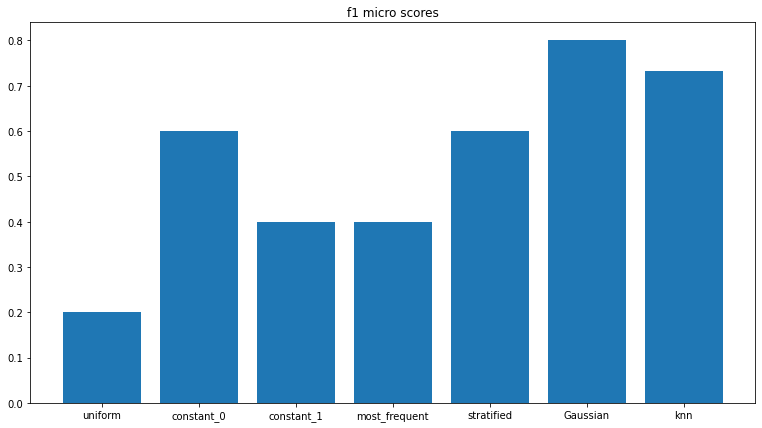

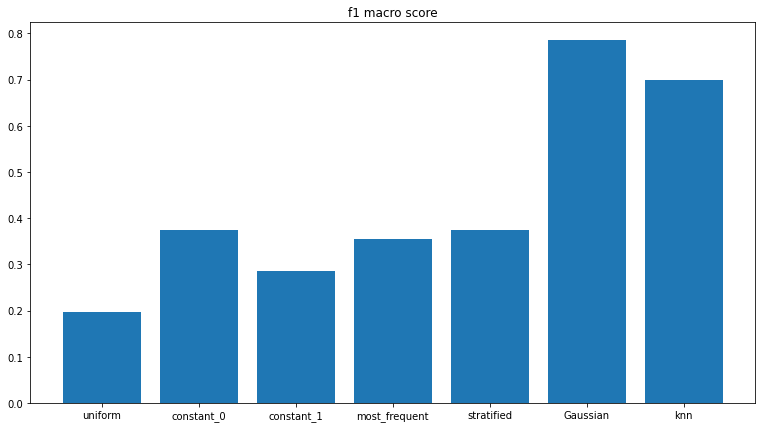

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,7))
classifiers = ['uniform', 'constant_0', 'constant_1', 'most_frequent', 'stratified', 'Gaussian','knn']
ax.bar(classifiers, f1_micros, width=0.8)
ax.set_title('f1 micro scores')

fig, ax = plt.subplots(figsize=(13,7))
ax.bar(classifiers, f1_macros, width=0.8)
ax.set_title('f1 macro score')

plt.show()

Μετά από πολλαπλές επαναλλήψεις του κώδικα είδαμε μεγάλες διαφορές στα αποτελέσματα το οποίο μας οδηγεί στο συμπέρασμα πως ο τρόπος που χωρίστηκε το training και το test set παίζει μεγάλο ρόλο. Αυτό συμβαίνει καθώς έχουμε πολύ λίγα δείγματα λόγω της έλλειψης τιμών ("?") στην στήλη των labels.



*   Για τους Dummy Classifiers παρατηρούμε πως μεγαλύτερες διακυμάνσεις στα τελικά αποτελέσματα έχει ο uniform το οποίο είναι αναμενόμενο καθώς προβλέπει τυχαία. Για τους βλέπουμε πως θέτοντας την τιμή 0 έχουμε καλύτερα αποτελέσματα, γεγονός που περιμέναμε αφού αποτελεί και το μεγαλύτερο μέέρος των δειγμάτων. 
*  Ο Gaussian Naive Bayes βλέπουμε να σημειώνει τα καλύτερα αποτελέσματα και στη συνέχεια ο Knn καθώς βασίζονται σε αλγόριθμους λογικής ανάλυσης δεδομένων.

Συγκρίνοντας τα δύο διαγράμματα παρατηρούε πως η τιμή F1 micro είναι σταθερά μεγαλύτερη σε όλες τις περιπτώσεις. 






## Section C: Optimization

### Pre-processing of Data set

Στην αρχή, θα χρησιμοποιήσουμε την τεχνική του κατωφλίου διακύμανσης (Variance threshold) η οποία βασίζεται στο ότι αν ένα χαρακτηριστικό έχει χαμηλή διακύμανση δεν βοηθάει σημαντικά στην ορθή ταξινόμηση. Συνεπώς, θα χρησιμοποιήσουμε την συνάρτηση VarianceThreshold() για την αφαίρεση των χαρακτηριστικών με διακύμανση χαμηλότερη του κατωφλίου.


Στη συνέχεια θα κάνουμε κανονικοποίηση των χαρακτηριστικών ώστε να αποφύγουμε χαρακτηριστικά με πολύ μεγάλες διαφορές στις τιμές τους καθώς μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση.

Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές και γίνεται με 2 τρόπους: Διαιρώντας με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] ή με το standard score του κάθε χαρακτηριστικού, που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα.


In [ ]:
from imblearn.over_sampling import RandomOverSampler

randomOS = RandomOverSampler(random_state = 0)
x_train_r, y_train_r = randomOS.fit_sample(x_train,y_train)
new_balance = sum(y_train_r == 0)/sum(y_train_r==1)
print("The new balance is :",new_balance,'\n') 

The new balance is : 1.0 



Βλέπουμε πως πλέον η αναλογία τιμών 0 και 1 είναι  1 και συνεπώς το training set είναι ισορροπημένο. Το Oversamping έγινε μόνο στο training set, αφού το test set θέλουμε να μείνει αναλοίωτο.

### Dummy Classifiers

Οι Dummy Classifiers δεν μπορούν να βελτιωθούν παρόλα αυτά παραθέτουμε παρακάτω τα πλήρη στοιχεία μετά το Oversampling, βλέποντας και στο τέλος πως δεν υπήρξε ουσιαστική βελτιστοποίηση. 

In [ ]:
new_predictions, new_accuracies, fit_times, pred_times = DummyClassification(x_train_r,y_train_r,x_test,y_test)

print("Classification Accuracy of Dummy Classifiers:\n")
sorted_new_accuracy = [(k, new_accuracies[k]) for k in sorted(new_accuracies, key=new_accuracies.get, reverse=True)]
for k,v in sorted_new_accuracy:
    print(k,v)

print("\nConfusion Matrices of Dummy Classifiers:\n")
for strategy in new_predictions: print("Stratehy",strategy,":\n",confusion_matrix(y_test,new_predictions[strategy]))

for strategy in new_predictions:
    print("\nf1-micro average for",strategy,":",f1_score(y_test,new_predictions[strategy], average='micro'))
    print("f1-macro average for",strategy,":",f1_score(y_test,new_predictions[strategy], average='macro'))
    
print("\nTime for Fit and Predict of Dummy Classifiers :\n")
for strategy in fit_times:
    print("Fitting time for",strategy,":",fit_times[strategy])
    print("Predict time for",strategy,":",pred_times[strategy],"\n")

Classification Accuracy of Dummy Classifiers:

uniform 0.8
const_0 0.6
frequent 0.6
const_1 0.4
stratif 0.3333333333333333

Confusion Matrices of Dummy Classifiers:

Stratehy uniform :
 [[6 3]
 [1 5]]
Stratehy const_0 :
 [[9 0]
 [6 0]]
Stratehy const_1 :
 [[0 9]
 [0 6]]
Stratehy stratif :
 [[4 5]
 [3 3]]
Stratehy frequent :
 [[9 0]
 [6 0]]

f1-micro average for uniform : 0.7333333333333333
f1-macro average for uniform : 0.7321428571428572

f1-micro average for const_0 : 0.6
f1-macro average for const_0 : 0.37499999999999994

f1-micro average for const_1 : 0.4000000000000001
f1-macro average for const_1 : 0.28571428571428575

f1-micro average for stratif : 0.4666666666666667
f1-macro average for stratif : 0.4642857142857143

f1-micro average for frequent : 0.6
f1-macro average for frequent : 0.37499999999999994

Time for Fit and Predict of Dummy Classifiers :

Fitting time for uniform : 0.0005538463592529297
Predict time for uniform : 0.00021457672119140625 

Fitting time for const_0 : 

### Optimize Knn 

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
mscaler = MinMaxScaler()
ros = RandomOverSampler()
sscaler = StandardScaler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1)

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('kNN', clf)])

Στη συνέχεια για την  θα χρησιμποιήσουμε την GridSearchCV για να βελτιστοποιήσουμε τις υπερπαραμέτρους μας η οποία κάνει μαζί cross-validation και grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
#Υπερπαράμετροι προς βελτιστοποίηση kNN: n_neighbors

vthreshold = [0, 0.5, 49, 53] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components = np.arange(1,10,1)
k = np.arange(1,50,5) # η υπερπαράμετρος του ταξινομητή


In [ ]:
#Dokimazontas me ola ta pre-processing

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-micro average of Knn Classifier: 0.8000000000000002

f1-macro average of Knn Classifier: 0.784688995215311


Confusion Matrix of Knn:
 [[8 1]
 [2 4]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=1)),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=46))])
{'kNN__n_neighbors': 46, 'pca__n_components': 1, 'selector__threshold': 0}


In [ ]:
#dokimazontas xwris pca 

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)



f1-micro average of Knn Classifier: 0.8666666666666667

f1-macro average of Knn Classifier: 0.8611111111111112


Confusion Matrix of Knn:
 [[8 1]
 [1 5]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=41))])
{'kNN__n_neighbors': 41, 'selector__threshold': 0}


In [ ]:
#Without scaler and pca

pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)
estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)




f1-micro average of Knn Classifier: 0.8000000000000002

f1-macro average of Knn Classifier: 0.784688995215311


Confusion Matrix of Knn:
 [[8 1]
 [2 4]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=41))])
{'kNN__n_neighbors': 41, 'selector__threshold': 0}


In [ ]:
#vlepoyme pws exoyme kalytera apotelesmata xwris pca kai me scaler 
#twra tha dokimasoyme xwris sampler


pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-micro average of Knn Classifier: 0.7333333333333333

f1-macro average of Knn Classifier: 0.6590909090909091


Confusion Matrix of Knn:
 [[9 0]
 [4 2]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82         9
           1       1.00      0.33      0.50         6

    accuracy                           0.73        15
   macro avg       0.85      0.67      0.66        15
weighted avg       0.82      0.73      0.69        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.5)),
                ('scaler', StandardScaler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=6))])
{'kNN__n_neighbors': 6, 'selector__threshold': 0.5}


Παρατηρούμε πως καλύτερη απόδοση είχαμε στην περίπτωση pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('kNN', clf)]) στην οποια θα αναζητησουμε και τις καλύτερες μεταβλητές.

In [ ]:
vthreshold = [0] 
k = np.arange(17,26,1)

pipe = Pipeline(steps=[ ('selector',selector),('scaler',sscaler),('sampler', ros), ('kNN', clf)])

estimator_knn = GridSearchCV(pipe, dict( selector__threshold=vthreshold, kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

estimator_knn.fit(x_train,y_train)
new_predictions['knn'] = estimator_knn.predict(x_test)

new_accuracies['knn'] = estimator_knn.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))


print(classification_report(y_test, new_predictions['knn']))
print(estimator_knn.best_estimator_)
print(estimator_knn.best_params_)


f1-micro average of Knn Classifier: 0.8666666666666667

f1-macro average of Knn Classifier: 0.8500000000000001


Confusion Matrix of Knn:
 [[9 0]
 [2 4]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=22))])
{'kNN__n_neighbors': 22, 'selector__threshold': 0}


Οι παραπάνω τιμές για τις μεταβλητές μας επιλέχθηκαν ύστερα από αναζήτηση σε αρχικά μεγάλο διάστημα τιμών και στη συνέχεια περιορισμό του.
Έχοντας βρει τις βέλτιστες τιμές θα προχωρήσουμε στην εκπαίδευση του ταξινομητή.

In [ ]:
#Fit

pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=22))])
{'kNN__n_neighbors': 22, 'selector__threshold': 0}

start_time = time.time()
pipe.fit(x_train,y_train)
fit_times['knn'] = time.time()-start_time

start_time = time.time()
new_predictions['knn'] = pipe.predict(x_test)
pred_times['knn'] = time.time()-start_time

new_accuracies['knn'] = pipe.score(x_test,y_test)

print("\nf1-micro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='micro'))
print("\nf1-macro average of Knn Classifier:",f1_score(y_test,new_predictions['knn'], average='macro'))
print()
print("\nConfusion Matrix of Knn:\n",confusion_matrix(y_test,new_predictions['knn']))
print("\nClassification Report of Knn:\n",classification_report(y_test,new_predictions['knn']))
print("\nFit time:\n",fit_times['knn'])
print("\nPrediction time:\n",pred_times['knn'],"\n")




f1-micro average of Knn Classifier: 0.8666666666666667

f1-macro average of Knn Classifier: 0.8500000000000001


Confusion Matrix of Knn:
 [[9 0]
 [2 4]]

Classification Report of Knn:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

    accuracy                           0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15


Fit time:
 0.0031828880310058594

Prediction time:
 0.10330748558044434 



### Optimize GNB

Για τον Gaussian Naive Bayes δεν έχουμε υπερπαραμέτρους να βελτιστοποιήσουμε, παρόλα αυτά θα χρησιμοποιήσουμε cross validation για να βρούμε τις κατάλληλες παραμετρους του που τον βελτιστοποιούν.

In [ ]:
#Arxika tha doyme kai me ta 4 processing
selector = VarianceThreshold() 
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB() 

vthreshold = [0, 0.5, 0.9, 1] 
n_components = np.arange(1,10,1) #gia pca

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.8666666666666667

f1-macro average of GNB Classifier: 0.8611111111111112


Confusion Matrix of Gaussian NB:
 [[8 1]
 [1 5]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=2)), ('gnb', GaussianNB())])
{'pca__n_components': 2, 'selector__threshold': 1}


In [ ]:
#Without pca 

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros),  ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.8000000000000002

f1-macro average of GNB Classifier: 0.784688995215311


Confusion Matrix of Gaussian NB:
 [[8 1]
 [2 4]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0.9)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('gnb', GaussianNB())])
{'selector__threshold': 0.9}


In [ ]:
#With pca, without scaler

pipe = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.8000000000000002

f1-macro average of GNB Classifier: 0.7963800904977376


Confusion Matrix of Gaussian NB:
 [[7 2]
 [1 5]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.71      0.83      0.77         6

    accuracy                           0.80        15
   macro avg       0.79      0.81      0.80        15
weighted avg       0.81      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=3)),
                ('gnb', GaussianNB())])
{'pca__n_components': 3, 'selector__threshold': 0}


In [ ]:
#without sampler

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.7333333333333333

f1-macro average of GNB Classifier: 0.7


Confusion Matrix of Gaussian NB:
 [[8 1]
 [3 3]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.75      0.50      0.60         6

    accuracy                           0.73        15
   macro avg       0.74      0.69      0.70        15
weighted avg       0.74      0.73      0.72        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=0)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=1)),
                ('gnb', GaussianNB())])
{'pca__n_components': 1, 'selector__threshold': 0}


Βλέπουμε πως η καλύτερη αρχιτεκτονική είναι pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('gnb', clf)]). Στη συνέχεια θα μελετήσουμε την τιμή των μεταβλητών.

In [ ]:
selector = VarianceThreshold() 
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB() 

vthreshold = [0.5,1] 
n_components = np.arange(1,3,1) #gia pca

pipe = Pipeline(steps=[('selector', selector), ('scaler',sscaler),('sampler', ros), ('pca', pca), ('gnb', clf)])
estimator_gnb = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_micro', n_jobs=-1)


estimator_gnb.fit(x_train,y_train)

new_predictions['GNB'] = estimator_gnb.predict(x_test)

new_accuracies['GNB'] = estimator_gnb.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of Gaussian NB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of Gaussian NB:\n",classification_report(y_test,new_predictions['GNB']))


print(estimator_gnb.best_estimator_)
print(estimator_gnb.best_params_)



f1-micro average of GNB Classifier: 0.8000000000000002

f1-macro average of GNB Classifier: 0.784688995215311


Confusion Matrix of Gaussian NB:
 [[8 1]
 [2 4]]

Classification Report of Gaussian NB:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15

Pipeline(steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=2)), ('gnb', GaussianNB())])
{'pca__n_components': 2, 'selector__threshold': 1}


In [ ]:
#Final fit

pipe = Pipeline(steps=[('selector', VarianceThreshold(threshold=1)),
                ('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=1)), ('gnb', GaussianNB())])
{'pca__n_components': 1, 'selector__threshold': 1}

start_time = time.time()
pipe.fit(x_train,y_train)
fit_times['GNB'] = time.time()-start_time

start_time = time.time()
new_predictions['GNB'] = pipe.predict(x_test)
pred_times['GNB'] = time.time()-start_time

new_accuracies['GNB'] = pipe.score(x_test,y_test)

print("\nf1-micro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='micro'))
print("\nf1-macro average of GNB Classifier:",f1_score(y_test,new_predictions['GNB'], average='macro'))
print()
print("\nConfusion Matrix of GNB:\n",confusion_matrix(y_test,new_predictions['GNB']))
print("\nClassification Report of GNB:\n",classification_report(y_test,new_predictions['GNB']))
print("\nFit time:\n",fit_times['GNB'])
print("\nPrediction time:\n",pred_times['GNB'],"\n")








f1-micro average of GNB Classifier: 0.8000000000000002

f1-macro average of GNB Classifier: 0.7619047619047619


Confusion Matrix of GNB:
 [[9 0]
 [3 3]]

Classification Report of GNB:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.50      0.67         6

    accuracy                           0.80        15
   macro avg       0.88      0.75      0.76        15
weighted avg       0.85      0.80      0.78        15


Fit time:
 0.0041234493255615234

Prediction time:
 0.0006663799285888672 



### Plot for F1

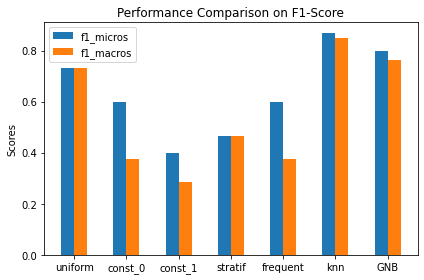

In [ ]:
f1_macros, f1_micros, labels = [],[],[]
for clf in new_predictions:  
    f1_micros.append(f1_score(y_test,new_predictions[clf],average='micro'))
    f1_macros.append(f1_score(y_test,new_predictions[clf],average='macro'))
    labels.append(clf)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, f1_micros, width, label='f1_micros')
rects2 = ax.bar(x + width/2, f1_macros, width, label='f1_macros')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison on F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()



### Compare Accuracies before/after optimization

In [ ]:
perf = pd.DataFrame(columns=['f1-micro before', 'f1-micro after', 'f1-macro before', 'f1-macro-after'])

for clf in new_predictions: 
  perf.loc[clf, 'f1-micro before'] = f1_score(y_test,predictions[clf],average='micro')
  perf.loc[clf, 'f1-micro after'] = f1_score(y_test,new_predictions[clf],average='micro')
  perf.loc[clf, 'f1-macro before'] =f1_score(y_test,predictions[clf],average='macro')
  perf.loc[clf, 'f1-macro-after'] = f1_score(y_test,new_predictions[clf],average='macro')

pd.set_option('display.max_columns', None)

print(perf)

         f1-micro before f1-micro after f1-macro before f1-macro-after
uniform              0.2       0.733333        0.196429       0.732143
const_0              0.6            0.6           0.375          0.375
const_1              0.4            0.4        0.285714       0.285714
stratif              0.4       0.466667        0.354067       0.464286
frequent             0.6            0.6           0.375          0.375
knn             0.733333       0.866667             0.7           0.85
GNB                  0.8            0.8        0.784689       0.761905


Σχολιασμός 

Παρατηρούμε πως για τους Dummy Classifiers δεν έχουμε ουσιαστικά καποια βελτιστοποίηση οπώς ήταν αναμενόμενο. Οι διαφορές που προκύπτουν λόγω του oversampling δεν αποδεικνύουν και βελτίωση της απόδοσης. Για τον K-NN βλέέπουμε σημαντική βελτίωση στην απόδοση του ενώ ο Gaussian Naive Bayes παραμένει στα αρχικά επίπεδα παρόλη τη διαδικασία του. Τέλος, οι χρόνοι είναι αρκετά μικροί καθώς τα δεδομένα μας είναι πολύ λίγα και η αρχιτεκτονική που χρησιμοποιήθηκε απλή. 